In [ ]:
import pandas as pd
ins=pd.read_csv('/content/insurance.csv')
ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# **Data Analysis & Data Visualization**

In [ ]:
ins.shape

(1338, 7)

It shows that the dataset have 7 features and 1338 entris

In [ ]:
ins.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

1. all the 7 features 
2. one terget feature('charges') and others input features

In [ ]:
ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

checking whether there are any nan values or not

In [ ]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


there are 3 object type 2 integer type and 2 float type features 

# **Data Preprocessing**

In [ ]:
ins['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

There are 2 distinct values in the feature **'sex'**. We can encode the values as this:

**male as 0;**


**female as 1;**

In [ ]:
sx={'male':0,'female':1}
ins['sex']=ins['sex'].map(sx)

In [ ]:
ins['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

There are 2 distinct values in the feature **'smoker'**. We can encode the values as this:

**yes as 0;**


**no as 1;**

In [ ]:
sk={'yes':0,'no':1}
ins['smoker']=ins['smoker'].map(sk)

In [ ]:
ins['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

similarly There are 2 distinct values in the feature **'region'**. We can encode the values as this:

**northeast as 0;**


**southeast as 1;**


**northwest as 2;**


**southwest as 3;**

In [ ]:
rg={'northeast':0,'southeast':1,'northwest':2,'southwest':3}
ins['region']=ins['region'].map(rg)

In [ ]:
ins

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,3,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2,10600.54830
1334,18,1,31.920,0,1,0,2205.98080
1335,18,1,36.850,0,1,1,1629.83350
1336,21,1,25.800,0,1,3,2007.94500


In [ ]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


Now everything looks just fine

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

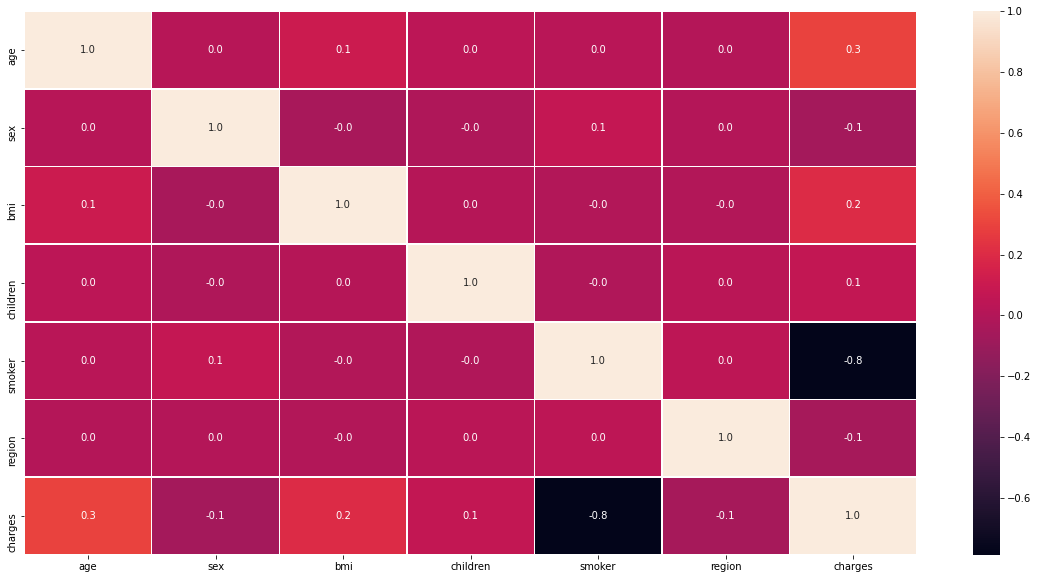

In [ ]:
f,ax = plt.subplots(figsize=(20,10))
sns.heatmap(ins.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

1. this is the heatmap which shows the dependency of any feature to the another features
2. from the above heatmap we can say that insurance charge mostly depend on the input feature 'smoker'


# **Building the Model**

The first task will be to **split the dataset** into train set and test set.

In [ ]:
from sklearn.model_selection import train_test_split
x=ins.drop('charges',axis=1)
y=ins['charges']
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.30)

Let's check the dimension of train and test set

In [ ]:
X_train.shape

(936, 6)

In [ ]:
y_train.shape

(936,)

In [ ]:
X_test.shape

(402, 6)

In [ ]:
y_test.shape

(402,)

Importing all the models from sklearn

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

## Linear Regression

In [ ]:
lr = LinearRegression()
lr=lr.fit(X_train,y_train)

In [ ]:
pred = lr.predict(X_test)
s=mean_absolute_error(y_test,pred)
s1=mean_squared_error(y_test,pred)
s2=r2_score(y_test,pred)

print("The MAE with the linear regressor is: "+str(s))
print("The MsE with the linear regressor is: "+str(s1))
print("The R2_Score with the linear regressor is: "+str(s2))

The MAE with the linear regressor is: 4179.899930785874
The MsE with the linear regressor is: 36468692.97505916
The R2_Score with the linear regressor is: 0.7142363438819112


## Decision Tree Regression

In [ ]:
dtr = DecisionTreeRegressor() 
dtr=dtr.fit(X_train,y_train)

In [ ]:
pred = dtr.predict(X_test)
s=mean_absolute_error(y_test,pred)
s1=mean_squared_error(y_test,pred)
s2=r2_score(y_test,pred)

print("The MAE with the DT regressor is: "+str(s))
print("The MsE with the DT regressor is: "+str(s1))
print("The R2_Score with the DT regressor is: "+str(s2))

The MAE with the DT regressor is: 3394.75960840796
The MsE with the DT regressor is: 48393664.49202954
The R2_Score with the DT regressor is: 0.6207939092401196


## Random Forest Regression

In [ ]:
r = RandomForestRegressor()
r=r.fit(X_train,y_train)

In [ ]:
pred = r.predict(X_test)
s=mean_absolute_error(y_test,pred)
s1=mean_squared_error(y_test,pred)
s2=r2_score(y_test,pred)

print("The MAE with the RF regressor is: "+str(s))
print("The MsE with the RF regressor is: "+str(s1))
print("The R2_Score with the RF regressor is: "+str(s2))

The MAE with the RF regressor is: 2883.1290976340083
The MsE with the RF regressor is: 26142191.73301262
The R2_Score with the RF regressor is: 0.7951533855717063


From all the models, DT regressor gave the minimum error, So thats the best model and should be chosen as the final model.